# Predicting diabetes cases
## Luiz Gustavo Silva de Oliveira (gustavo.if.ufrj@gmail.com)

In [70]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [71]:
# Loading dataset and giving it a first look
dataset = pd.read_csv("diabetes.csv")
print(dataset.shape)
dataset.head()

(768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [72]:
# Checking null values
dataset.isnull().values.any()

False

In [73]:
# Function to plot correlation between variables
def vars_corr(dataframe, size_x = 16, size_y = 9):
    corr = dataframe.corr()
    plt.figure(figsize = (size_x, size_y))
    # First option: seaborn
    sns.heatmap(corr,
                xticklabels = corr.columns.values,
                yticklabels = corr.columns.values,
                linewidths = .5,
                annot = True)#,
                #fmt = "d")
    plt.show()
    # Plan B: matplotlib
    #fig, ax = plt.subplots(figsize = (size_x, size_y))
    #ax.matshow(corr)
    #plt.xticks(range(len(corr.columns)), corr.columns)
    #plt.yticks(range(len(corr.columns)), corr.columns)

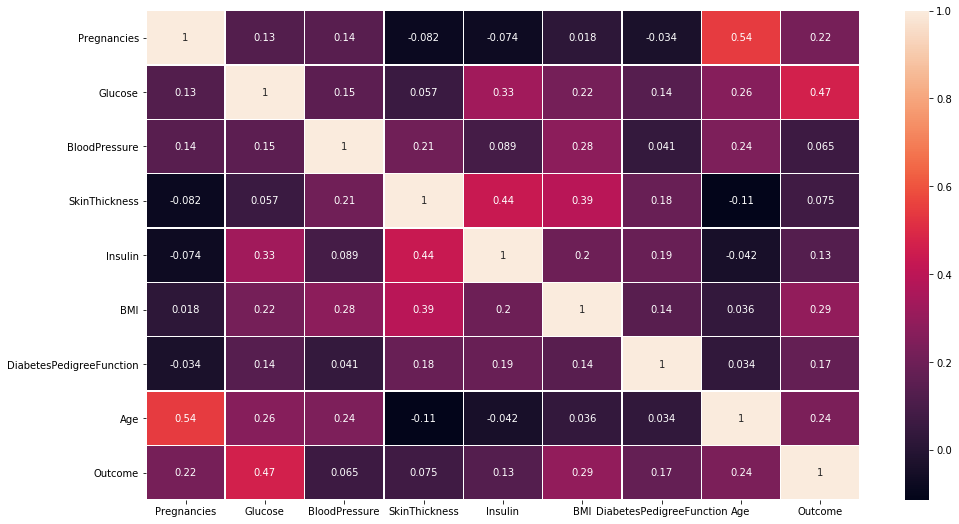

In [74]:
# Plotting correlation
vars_corr(dataframe = dataset)

In [75]:
# Number of True and False cases
num_true = len(dataset.loc[dataset.Outcome == True])
num_false = len(dataset.loc[dataset.Outcome == False])
print("Positive diabetes: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false))*100))
print("Negative diabetes: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false))*100))

Positive diabetes: 268 (34.90%)
Negative diabetes: 500 (65.10%)


In [76]:
# Balancing the dataset
data_true = dataset[dataset.Outcome == True]
data_false = dataset[dataset.Outcome == False]
if (len(data_true) < len(data_false)): data_false = data_false[0:len(data_true)]
if (len(data_true) > len(data_false)): data_true = data_true[0:len(data_false)]
data_bal = pd.concat([data_true, data_false])

In [77]:
# Number of True and False cases
num_true = len(data_bal.loc[data_bal.Outcome == True])
num_false = len(data_bal.loc[data_bal.Outcome == False])
print("Positive diabetes: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false))*100))
print("Negative diabetes: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false))*100))

Positive diabetes: 268 (50.00%)
Negative diabetes: 268 (50.00%)


In [78]:
# Spliting training and test datasets
from sklearn.model_selection import train_test_split
test_size = 0.3
# Variable selecting
var = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
       "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
tgt = "Outcome"
X = data_bal[var].values
Y = data_bal[tgt].values

X_tr, X_tt, Y_tr, Y_tt = train_test_split(X, Y, test_size = test_size, random_state = 42)

In [80]:
# Hidden missing values
data_bal.isnull().values.any() # --> False, but there are 0 values in insulin column for example
print("# Lines in balanced dataset {0}".format(len(data_bal)))
print("# Lines missing in Glucose {0}".format(len(data_bal[data_bal.Glucose == 0])))
print("# Lines missing in BloodPressure {0}".format(len(data_bal[data_bal.BloodPressure == 0])))
print("# Lines missing in SkinThickness {0}".format(len(data_bal[data_bal.SkinThickness == 0])))
print("# Lines missing in Insulin {0}".format(len(data_bal[data_bal.Insulin == 0])))
print("# Lines missing in BMI {0}".format(len(data_bal[data_bal.BMI == 0])))
print("# Lines missing in Age {0}".format(len(data_bal[data_bal.Age == 0])))

# Lines in balanced dataset 536
# Lines missing in Glucose 5
# Lines missing in BloodPressure 26
# Lines missing in SkinThickness 159
# Lines missing in Insulin 263
# Lines missing in BMI 8
# Lines missing in Age 0


In [81]:
# Inputing mean value in missing hidden values
from sklearn.impute import SimpleImputer
fill_zeroes = SimpleImputer(missing_values = 0, strategy = "mean")

# Filling zeroes in required columns
X_tr = fill_zeroes.fit_transform(X_tr)
X_tt = fill_zeroes.fit_transform(X_tt)

In [82]:
# Building machine learning model
from sklearn.naive_bayes import GaussianNB
model_v1 = GaussianNB()
model_v1.fit(X_tr, Y_tr.ravel()) # ravel returns a contiguous flattened array

GaussianNB(priors=None, var_smoothing=1e-09)

In [84]:
# Test accuracy and precision of model
from sklearn import metrics
nb_predict_tr = model_v1.predict(X_tr)
print("Accuracy on train sample: {0:.4f}".format(metrics.accuracy_score(Y_tr, nb_predict_tr)))

nb_predict_tt = model_v1.predict(X_tt)
print("Accuracy on test sample: {0:.4f}".format(metrics.accuracy_score(Y_tt, nb_predict_tt)))

Accuracy on train sample: 0.7280
Accuracy on test sample: 0.7267


In [87]:
# Confusion matrix
print("Confusion Matrix and Classification Report")

print("{0}".format(metrics.confusion_matrix(Y_tt, nb_predict_tt)))

print("")
print("Classification Report")
print(metrics.classification_report(Y_tt, nb_predict_tt, labels = [1, 0]))

Confusion Matrix and Classification Report
[[62 23]
 [21 55]]

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.72      0.71        76
           0       0.75      0.73      0.74        85

    accuracy                           0.73       161
   macro avg       0.73      0.73      0.73       161
weighted avg       0.73      0.73      0.73       161



In [89]:
# Random Forest optmisation
from sklearn.ensemble import RandomForestClassifier

model_v2 = RandomForestClassifier()
model_v2.fit(X_tr, Y_tr.ravel())

nb_predict_tr = model_v2.predict(X_tr)
print("Accuracy on train sample: {0:.4f}".format(metrics.accuracy_score(Y_tr, nb_predict_tr)))
#
nb_predict_tt = model_v2.predict(X_tt)
print("Accuracy on test sample: {0:.4f}".format(metrics.accuracy_score(Y_tt, nb_predict_tt)))

print("Confusion Matrix and Classification Report")
#
print("{0}".format(metrics.confusion_matrix(Y_tt, nb_predict_tt)))
#
print("")
print("Classification Report")
print(metrics.classification_report(Y_tt, nb_predict_tt, labels = [1, 0]))

Accuracy on train sample: 1.0000
Accuracy on test sample: 0.7205
Confusion Matrix and Classification Report
[[56 29]
 [16 60]]

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.79      0.73        76
           0       0.78      0.66      0.71        85

    accuracy                           0.72       161
   macro avg       0.73      0.72      0.72       161
weighted avg       0.73      0.72      0.72       161



In [92]:
# Logistic Regression optmisation
from sklearn.linear_model import LogisticRegression

model_v3 = LogisticRegression(max_iter = 1000, C = 0.7)
model_v3.fit(X_tr, Y_tr.ravel())

nb_predict_tr = model_v3.predict(X_tr)
print("Accuracy on train sample: {0:.4f}".format(metrics.accuracy_score(Y_tr, nb_predict_tr)))
#
nb_predict_tt = model_v3.predict(X_tt)
print("Accuracy on test sample: {0:.4f}".format(metrics.accuracy_score(Y_tt, nb_predict_tt)))

print("Confusion Matrix and Classification Report")
#
print("{0}".format(metrics.confusion_matrix(Y_tt, nb_predict_tt)))
#
print("")
print("Classification Report")
print(metrics.classification_report(Y_tt, nb_predict_tt, labels = [1, 0]))

Accuracy on train sample: 0.7307
Accuracy on test sample: 0.7267
Confusion Matrix and Classification Report
[[59 26]
 [18 58]]

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.76      0.72        76
           0       0.77      0.69      0.73        85

    accuracy                           0.73       161
   macro avg       0.73      0.73      0.73       161
weighted avg       0.73      0.73      0.73       161



In [94]:
# Saving results
import pickle
filename = "log_reg_model.sav"
pickle.dump(model_v3, open(filename, 'wb'))

In [95]:
# Loading
loaded_model = pickle.load(open(filename, 'rb'))
res1 = loaded_model.predict(X_tt[15].reshape(1, -1))
print(res1)

[1]
